In [1]:
import PIL
import matplotlib.pyplot as plt

In [2]:
# Methods to load and display images 
def ShowImage(im, title='', ax=None):
    if ax is None:
        plt.figure()
    plt.axis('off')
    im = ((im + 1) * 127.5).astype(np.uint8)
    plt.imshow(im)
    plt.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
    if ax is None:
        plt.figure()
    plt.axis('off')

    plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=1)
    plt.title(title)

def LoadImage(file_path):
    im = PIL.Image.open(file_path)
    im = np.asarray(im)
    return im / 127.5 - 1.0

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
import attribute
from attribute import GradientAttribution

In [5]:
model = VGG16(weights='imagenet')

In [6]:
filename = "cat.jpg"

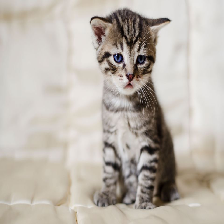

In [7]:
image = load_img(filename, target_size=(224, 224))
image

In [8]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
pred = model.predict(image, verbose=0)

In [9]:
predicted_index = pred.argmax()
print(predicted_index)

285


In [10]:
g = GradientAttribution(model)

In [11]:
grad = g.GetMask(image, predicted_index)

In [12]:
grad.shape

TensorShape([1, 224, 224, 3])

In [13]:
sgrad = g.GetSmoothedMask(image, predicted_index)

In [14]:
sgrad.shape

TensorShape([1, 224, 224, 3])

In [15]:
grad_mask_grayscale = attribute.VisualizeImageGrayscale(tf.squeeze(grad))

In [16]:
sgrad_mask_grayscale = attribute.VisualizeImageGrayscale(tf.squeeze(sgrad))

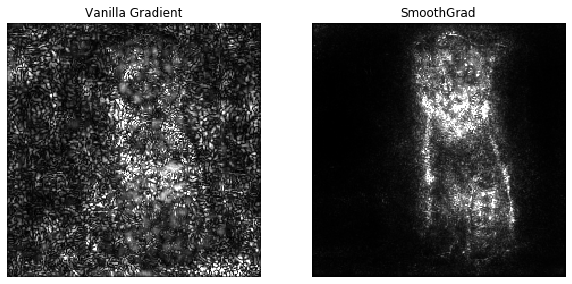

In [17]:
# Set up matplot lib figures.
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
plt.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks.
ShowGrayscaleImage(grad_mask_grayscale, title='Vanilla Gradient', ax=plt.subplot(ROWS, COLS, 1))
ShowGrayscaleImage(sgrad_mask_grayscale, title='SmoothGrad', ax=plt.subplot(ROWS, COLS, 2))

In [19]:
from attribute import IntegratedGradients

In [20]:
ig = IntegratedGradients(model)

In [21]:
igGrad = ig.GetMask(image, predicted_index)

In [22]:
igGrad_mask_grayscale = attribute.VisualizeImageGrayscale(tf.squeeze(igGrad))

In [23]:
igSmooth = ig.GetSmoothedMask(image, predicted_index)

In [24]:
igSmooth_mask_grayscale = attribute.VisualizeImageGrayscale(tf.squeeze(igSmooth))

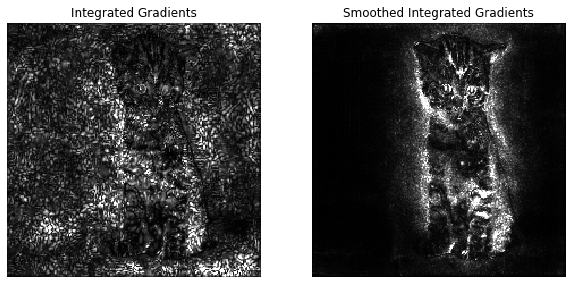

In [25]:
# Set up matplot lib figures.
ROWS = 1
COLS = 2
UPSCALE_FACTOR = 10
plt.figure(figsize=(ROWS * UPSCALE_FACTOR, COLS * UPSCALE_FACTOR))

# Render the saliency masks.
ShowGrayscaleImage(igGrad_mask_grayscale, title='Integrated Gradients', ax=plt.subplot(ROWS, COLS, 1))
ShowGrayscaleImage(igSmooth_mask_grayscale, title='Smoothed Integrated Gradients', ax=plt.subplot(ROWS, COLS, 2))